In [1]:
#planet-snowcover-snow/ASO_3M_SD_USCATE_20190705_4326_binary/15/5492/12642.tif

In [1]:
library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(raster)
library(gdalUtils)

Loading required package: sp


Attaching package: ‘raster’


The following object is masked from ‘package:dplyr’:

    select


The following object is masked from ‘package:tidyr’:

    extract




In [3]:
# get all the rasters aso tiles
#list files in a specific folder
veg_aso <- list.files(path = "~/veg-co-validate/")

In [4]:
asos <- list()
preds <-list()
for (vaso in veg_aso)
{
    #print(vaso)
    recur = list.files(path=paste("~/veg-co-validate/",vaso,sep=""),recursive = TRUE)
    #print(recur)
    for (filename in recur)
        {
          if (startsWith(filename,'mask/') & endsWith(filename,"merged.tif"))
              asos <- append(asos,paste("~/veg-co-validate/",vaso,"/",filename,sep=""))
              
           if (startsWith(filename,'preds/') & endsWith(filename,"merged.tif"))
              preds <- append(preds,paste("~/veg-co-validate/",vaso,"/",filename,sep=""))    
        }
}

print(asos) 
print(preds)        
    

[[1]]
[1] "~/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172142_103d_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCOGE_20180524_binary_merged.tif"

[[2]]
[1] "~/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172143_103d_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCOGE_20180524_binary_merged.tif"

[[3]]
[1] "~/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172144_103d_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCOGE_20180524_binary_merged.tif"

[[4]]
[1] "~/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172145_103d_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCOGE_20180524_binary_merged.tif"

[[5]]
[1] "~/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg

In [5]:
str(asos)

List of 19
 $ : chr "~/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-v"| __truncated__
 $ : chr "~/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-v"| __truncated__
 $ : chr "~/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-v"| __truncated__
 $ : chr "~/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-v"| __truncated__
 $ : chr "~/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-v"| __truncated__
 $ : chr "~/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-v"| __truncated__
 $ : chr "~/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-v"| __truncated__
 $ : chr "~/veg-co-vali

In [6]:
aso_un <- unlist(asos)
pred_un <- unlist(preds)

In [7]:
aso_un_list <- paste(aso_un, collapse=' ' )
pred_un_list <- paste(pred_un, collapse=' ' )

In [8]:
system("mkdir aso_veg_co_validate")

In [9]:
system("mkdir aso_veg_co_validate_pred")

In [10]:
file.copy(from=pred_un, to='./aso_veg_co_validate_pred', 
          overwrite = TRUE, recursive = FALSE, 
          copy.mode = TRUE)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE

In [11]:
for(i in 1:length(aso_un))
    {
     print(aso_un[i])
    file.copy(from=aso_un[i],to=paste('./aso_veg_co_validate/',i,'-ASO_3M_SD_USCOGE_20180524_binary_merged.tif',sep=""))
}

[1] "~/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172142_103d_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCOGE_20180524_binary_merged.tif"
[1] "~/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172143_103d_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCOGE_20180524_binary_merged.tif"
[1] "~/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172144_103d_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCOGE_20180524_binary_merged.tif"
[1] "~/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172145_103d_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCOGE_20180524_binary_merged.tif"
[1] "~/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172146_103d_3B_AnalyticM

In [10]:
fo <- list.files(path = "./aso_veg_co_validate", pattern = ".tif$", full.names = TRUE)
rlo <- lapply(fo, raster)

aso_dem <- do.call(merge, c(rlo, tolerance = 1))

ERROR: Error: validRow(x, row) is not TRUE


In [3]:
f <- list.files(path = "./aso_veg_co_validate_pred", pattern = ".tif$", full.names = TRUE)
rl <- lapply(f, raster)

aso_dem_pred <- do.call(merge, c(rl, tolerance = 1))


ERROR: Error: validRow(x, row) is not TRUE


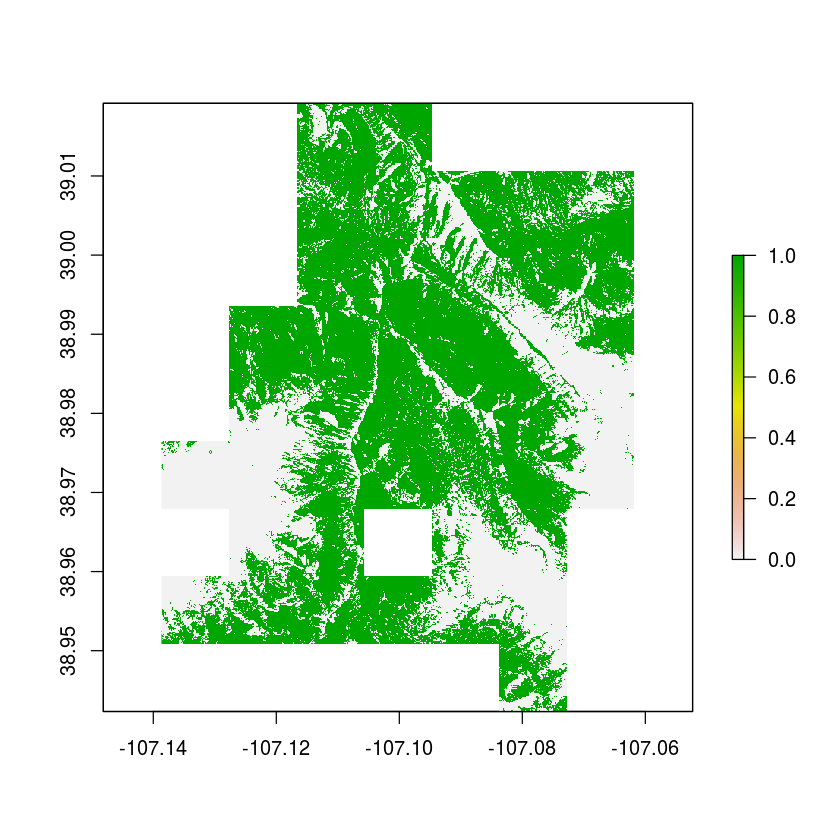

In [11]:
plot(raster(fo[2]))

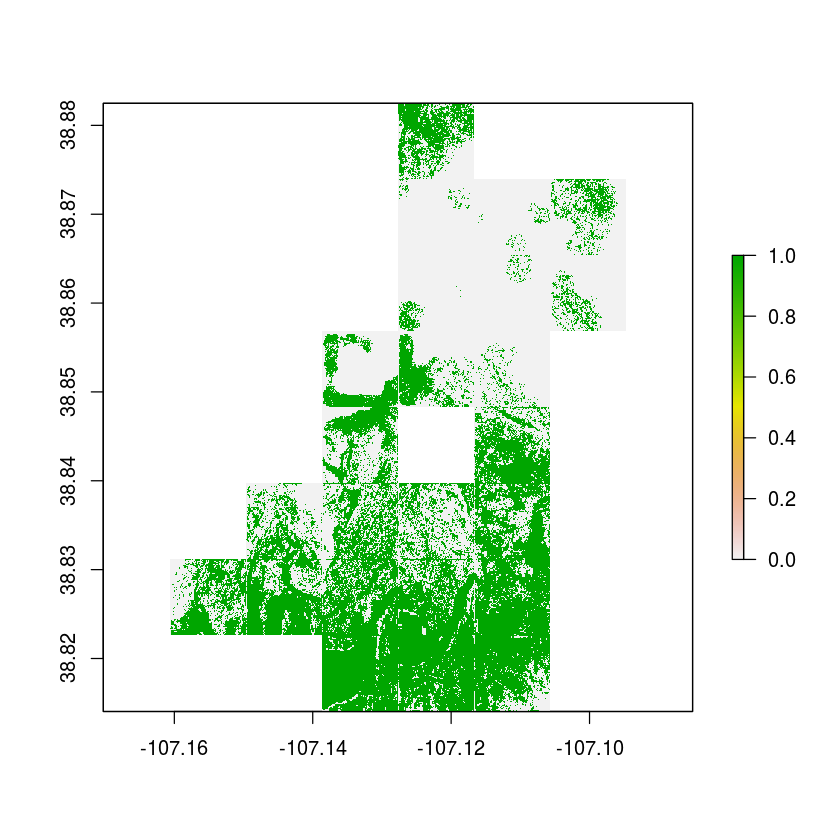

In [30]:
plot(raster(f[12]))

In [28]:
bf <- brick(f)

Warning message in if (x == "" | x == ".") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (!start %in% c("htt", "ftp")) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (fileext %in% c(".GRD", ".GRI")) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (!file.exists(x)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if ((fileext %in% c(".HE5", ".NC", ".NCF", ".NC4", ".CDF", ".NCDF", :
“the condition has length > 1 and only the first element will be used”
Warning message in if (fileext == ".GRD") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (fileext == ".BIG" | fileext == ".BRD") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (fileext %in% c(".BIN")) {:
“the condition has length > 1 and only the first ele

ERROR: Error in .rasterObjectFromFile(x, objecttype = "RasterBrick", ...): Cannot create a RasterLayer object from this file.


In [ ]:
aso_dem

In [ ]:
plot(aso_dem)

In [ ]:
aso_dem_pred

In [ ]:
plot(aso_dem_pred)

In [ ]:
# save the inter,ediate raster
writeRaster(aso_dem, filename="aso_veg_validate_co.tif", format="GTiff", overwrite=TRUE)



In [ ]:
writeRaster(aso_dem_pred, filename="aso_veg_pred_validate_co.tif", format="GTiff", overwrite=TRUE)

In [21]:
df <- stack(aso_dem,aso_dem_pred)

ERROR: Error in compareRaster(x): different extent


In [16]:
aso_dem <- raster("aso_veg_test_only.tif")

In [17]:
aso_dem_pred <- raster("aso_veg_pred_test_only.tif")

In [7]:
veg_vegResamp <- raster("veg_reasampl2point1by1point6.tif")


In [8]:
veg_crop<-crop(veg_vegResamp,extent(df))

In [11]:
veg_crop

class       : RasterLayer 
dimensions  : 26547, 31232, 829115904  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.8608, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /tmp/RtmprnXc2T/raster/r_tmp_2020-05-09_230744_8980_66895.grd 
names       : veg_reasampl2point1by1point6 
values      : 0, 54.08412  (min, max)


In [12]:
df

class       : RasterStack 
dimensions  : 26544, 31232, 829022208, 2  (nrow, ncol, ncell, nlayers)
resolution  : 2.145767e-05, 1.695862e-05  (x, y)
extent      : -119.8608, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
names       : aso_ndvi_test_only, aso_ndvi_pred_test_only 
min values  :                  0,                       0 
max values  :                  1,                       1 


In [13]:
veg_resampl_prj <- projectRaster(veg_crop,df)

In [14]:
writeRaster(veg_resampl_prj, filename="aso_ndvi_ch_test_only.tif", format="GTiff", overwrite=TRUE)

In [19]:
veg_resampl_prj <- raster("aso_ndvi_ch_test_only.tif")

In [20]:
df <- stack(aso_dem,aso_dem_pred,veg_resampl_prj)

In [21]:
data_matrix <- rasterToPoints(df)
head(data_matrix)
datafra_comb <- data_matrix %>% as.data.frame()

x,y,aso_ndvi_test_only,aso_ndvi_pred_test_only,aso_ndvi_ch_test_only
-119.7400,38.22954,0,1,NA
-119.7400,38.22954,0,1,NA
-119.7399,38.22954,0,1,NA
-119.7399,38.22954,0,1,NA
-119.7399,38.22954,0,1,NA
-119.7399,38.22954,0,1,NA


In [22]:
nrow(datafra_comb)

[1] 465846536

In [23]:
colnames(datafra_comb) <- c('x','y','aso_ndvi','aso_ndvi_pred','veg_height')

In [24]:
datafra_comb1m <- datafra_comb %>% filter(!is.na(veg_height) & veg_height > 1) %>% as.data.frame()

In [25]:
datafra_comb1m %>% group_by(aso_ndvi_pred) %>% summarize(count = n())

aso_ndvi_pred,count
0,15059664
1,11868986
NA,157507436


In [26]:
datafra_comb1m %>% group_by(aso_ndvi) %>% summarize(count = n())

aso_ndvi,count
0,24058205
1,2865239
NA,157512642


In [27]:
high_veg <- datafra_comb1m %>% filter(!is.na(veg_height)) %>% filter(veg_height > 1 ) %>% as.data.frame()
high_veg_perf<- confusionMatrix(high_veg$aso_ndvi, high_veg$aso_ndvi_pred,mode = "prec_recall")
high_veg_perf

ERROR: Error: cannot allocate vector of size 1.4 Gb


In [8]:
class <- c("0", "1")
f_score <- c(15059664,11868986)

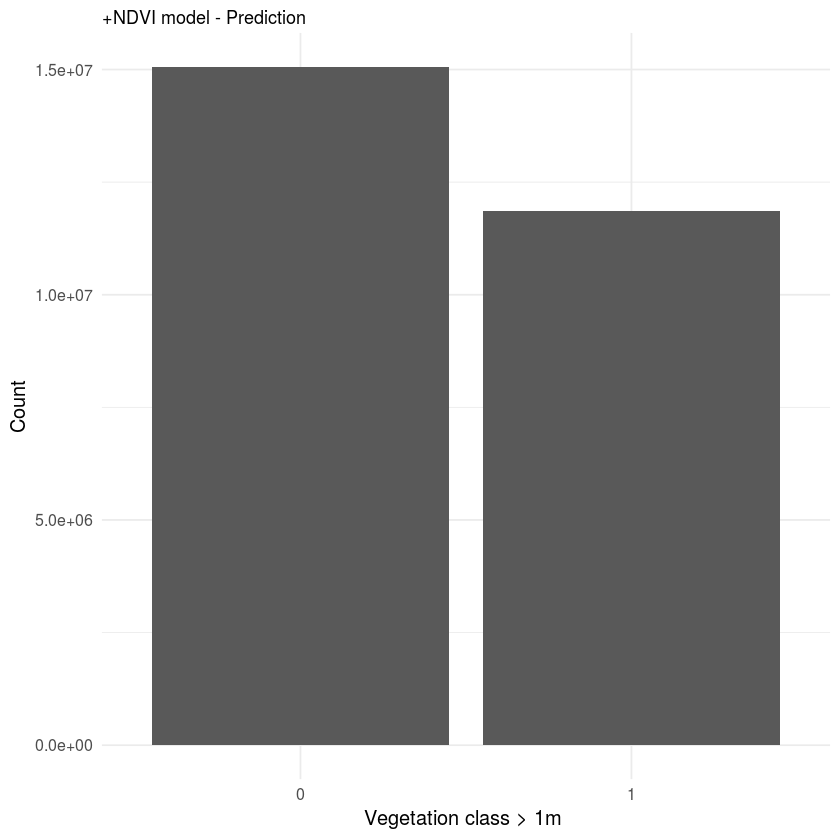

In [10]:
perf_pred<- data.frame(class, f_score)
colnames(perf_pred) <- c('class','f_score')
perf_pred %>% ggplot() + geom_bar(aes(class,f_score),stat="identity") +
 labs(x="Vegetation class > 1m " , y="Count",subtitle="+NDVI model - Prediction") + theme_minimal(base_size = 12)


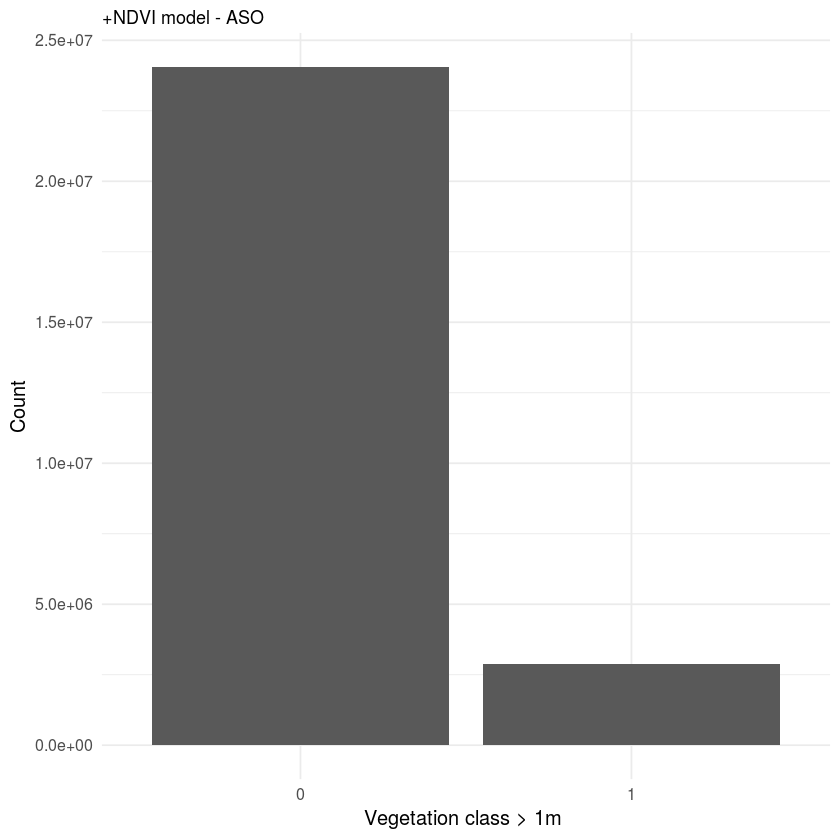

In [11]:
class <- c("0", "1")
f_score <- c(24058205,2865239)
perf_pred<- data.frame(class, f_score)
colnames(perf_pred) <- c('class','f_score')
perf_pred %>% ggplot() + geom_bar(aes(class,f_score),stat="identity") +
(breaks = c(0,5,10,15,20,25,30,35,40,45))+
 labs(x="Vegetation class > 1m " , y="Count",subtitle="+NDVI model - ASO") + theme_minimal(base_size = 12)


In [25]:
hist(datafra_comb1m$veg_height)

In [12]:
veg_crop

class       : RasterLayer 
dimensions  : 26544, 31232, 829022208  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695862e-05  (x, y)
extent      : -119.8608, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /tmp/Rtmp6j7AEs/raster/r_tmp_2020-04-23_154138_3786_72217.grd 
names       : veg_reasampl2point1by1point6 
values      : -9.832477e-10, 54.06391  (min, max)


In [9]:
df

class       : RasterStack 
dimensions  : 26544, 31232, 829022208, 2  (nrow, ncol, ncell, nlayers)
resolution  : 2.145767e-05, 1.695862e-05  (x, y)
extent      : -119.8608, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
names       : aso_ndvi_test_only, aso_ndvi_pred_test_only 
min values  :                  0,                       0 
max values  :                  1,                       1 


In [ ]:
#data_matrix <- rasterToPoints(df)
#head(data_matrix)
#datafra_comb <- data_matrix %>% as.data.frame()

In [12]:
veg_crop_aso <- crop(veg_crop, extent(df))

In [16]:
# mask all the pixels below 2
veg_crop_h <- veg_crop_aso
veg_crop_h[veg_crop_h < 2] <- NA
aso_demabove2 <- mask(aso_dem, veg_crop_h, filename="aso_ndviabove2_test.tif",overwrite=TRUE)

In [17]:
aso_dem_predabove2 <- mask(aso_dem_pred, veg_crop_h,filename="pred_ndviabove2_test.tif",overwrite=TRUE)

In [2]:
aso_dem_predabove2 <- raster("pred_demabove2_test.tif")

In [3]:
aso_demabove2 <- raster("aso_demabove2_test.tif")

In [18]:
vals_pred <- getValues(aso_dem_predabove2)

In [21]:
library(caret)

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [19]:
vals_aso <- getValues(aso_demabove2)

In [22]:
high_veg_perf<- confusionMatrix(vals_aso, vals_pred,mode = "prec_recall")

In [23]:
high_veg_perf

Confusion Matrix and Statistics

          Reference
Prediction        0        1
         0 10166991  6634352
         1    49902  1480682
                                          
               Accuracy : 0.6354          
                 95% CI : (0.6352, 0.6356)
    No Information Rate : 0.5573          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.1937          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
              Precision : 0.6051          
                 Recall : 0.9951          
                     F1 : 0.7526          
             Prevalence : 0.5573          
         Detection Rate : 0.5546          
   Detection Prevalence : 0.9165          
      Balanced Accuracy : 0.5888          
                                          
       'Positive' Class : 0               
                                          

In [24]:
#create below two mask all excpet the ones below .2
veg_crop_h <- veg_crop_aso
veg_crop_h[veg_crop_h > .2] <- NA
aso_vegbpoint2 <- mask(aso_dem, veg_crop_h, filename="aso_ndvibelowpoint2_test.tif",overwrite=TRUE)

In [25]:
aso_dem_predvegbpoint2 <- mask(aso_dem_pred, veg_crop_h,filename="pred_ndvibelowpoint2_test.tif",overwrite=TRUE)

In [26]:
vals_pred <- getValues(aso_dem_predvegbpoint2)

In [27]:
vals_aso <- getValues(aso_vegbpoint2)

In [28]:
low_veg_perf<- confusionMatrix(vals_aso, vals_pred,mode = "prec_recall")

In [29]:
low_veg_perf

Confusion Matrix and Statistics

          Reference
Prediction        0        1
         0  9026149 10949027
         1    73676  8734215
                                          
               Accuracy : 0.617           
                 95% CI : (0.6169, 0.6172)
    No Information Rate : 0.6838          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3297          
 Mcnemar's Test P-Value : <2e-16          
                                          
              Precision : 0.4519          
                 Recall : 0.9919          
                     F1 : 0.6209          
             Prevalence : 0.3162          
         Detection Rate : 0.3136          
   Detection Prevalence : 0.6940          
      Balanced Accuracy : 0.7178          
                                          
       'Positive' Class : 0               
                                          

In [30]:
#create below two and above .2
veg_crop_h <- veg_crop_aso
veg_crop_h[veg_crop_h < .2 &  veg_crop_h > 2] <- NA
aso_vegabovepoint2below2 <- mask(aso_dem, veg_crop_h, filename="aso_ndviabovepoint2andbelow2_test.tif",overwrite=TRUE)

In [31]:
aso_dem_predabovepoint2andbelow2 <- mask(aso_dem_pred, veg_crop_h,filename="pred_ndviabovepoint2andbelow2_test.tif",overwrite=TRUE)

In [32]:
vals_pred <- getValues(aso_dem_predabovepoint2andbelow2)

In [33]:
vals_aso <- getValues(aso_vegabovepoint2below2)

In [34]:
med_veg_perf<- confusionMatrix(vals_aso, vals_pred,mode = "prec_recall")

In [35]:
med_veg_perf

Confusion Matrix and Statistics

          Reference
Prediction        0        1
         0 28179704 22939789
         1   181878 13806255
                                         
               Accuracy : 0.6449         
                 95% CI : (0.6448, 0.645)
    No Information Rate : 0.5644         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.3383         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
              Precision : 0.5513         
                 Recall : 0.9936         
                     F1 : 0.7091         
             Prevalence : 0.4356         
         Detection Rate : 0.4328         
   Detection Prevalence : 0.7852         
      Balanced Accuracy : 0.6847         
                                         
       'Positive' Class : 0              
                                         

In [1]:
med_veg_perf

ERROR: Error in eval(expr, envir, enclos): object 'med_veg_perf' not found


In [2]:
class <- c("< .2m", "> .2 & < 2m"," > 2m")
f_score <- c(0.6209,0.7091,0.7526)

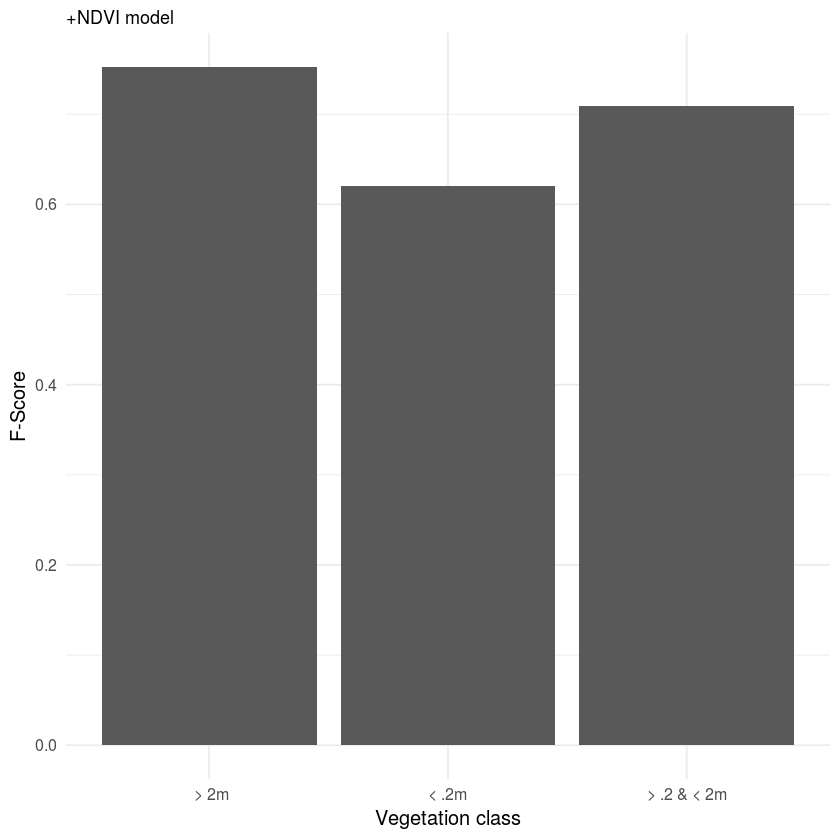

In [5]:
perf<- data.frame(class, f_score)
colnames(perf) <- c('class','f_score')
perf %>% ggplot() + geom_bar(aes(class,f_score),stat="identity") +
 labs(x="Vegetation class" , y="F-Score",subtitle="+NDVI model") + theme_minimal(base_size = 12)
ggsave(filename = "gg-ndvi+allclasses.png",dpi = 300,height=4,width=4,units="in")

In [13]:
# check the result

# mask all the pixels below 2
veg_crop_h <- veg_crop_aso
veg_crop_h[veg_crop_h < 1] <- NA
aso_demabove1 <- mask(aso_dem, veg_crop_h, filename="aso_ndviabove1_test.tif",overwrite=TRUE)

ERROR: Error in compareRaster(x, mask): different extent


In [15]:
aso_dem_pred


class       : RasterLayer 
dimensions  : 26544, 31232, 829022208  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695862e-05  (x, y)
extent      : -119.8608, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/planet-snowcover/pipeline/aso_ndvi_pred_test_only.tif 
names       : aso_ndvi_pred_test_only 
values      : 0, 1  (min, max)


In [16]:
veg_crop_h

class       : RasterLayer 
dimensions  : 26547, 31232, 829115904  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.8608, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /tmp/RtmpQ4jTi5/raster/r_tmp_2020-05-02_055321_2738_67490.grd 
names       : layer 
values      : 1, 54.08412  (min, max)


In [19]:
aso_dem_pred_prj <- projectRaster(aso_dem_pred,veg_crop_h)

In [20]:
aso_dem_pred_prj

class       : RasterLayer 
dimensions  : 26547, 31232, 829115904  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.8608, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /tmp/RtmpQ4jTi5/raster/r_tmp_2020-05-02_061011_2738_85770.grd 
names       : aso_ndvi_pred_test_only 
values      : -5.875066e-05, 1  (min, max)


In [21]:
aso_dem_predabove1 <- mask(aso_dem_pred_prj, 
                           veg_crop_h,filename="pred_ndviabove1_test.tif",overwrite=TRUE)

In [22]:
aso_dem_predabove1

class       : RasterLayer 
dimensions  : 26547, 31232, 829115904  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.8608, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/planet-snowcover/pipeline/pred_ndviabove1_test.tif 
names       : pred_ndviabove1_test 
values      : 0, 1  (min, max)


In [23]:
veg_crop_h

class       : RasterLayer 
dimensions  : 26547, 31232, 829115904  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.8608, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /tmp/RtmpQ4jTi5/raster/r_tmp_2020-05-02_055321_2738_67490.grd 
names       : layer 
values      : 1, 54.08412  (min, max)


In [24]:
writeRaster(veg_crop_h, filename="veg_above_1.tif", format="GTiff", overwrite=TRUE)

In [25]:
onem_df <- stack(aso_dem_predabove1,veg_crop_h)

In [26]:
data_matrix <- rasterToPoints(onem_df)
head(data_matrix)
datafra_comb <- data_matrix %>% as.data.frame()

x,y,pred_ndviabove1_test,layer
-119.4995,38.18838,NA,1.981519
-119.4995,38.18838,NA,1.463764
-119.4991,38.18838,NA,1.088179
-119.4991,38.18838,NA,1.055851
-119.4989,38.18838,NA,1.037520
-119.4989,38.18838,NA,1.102266


In [27]:
head(datafra_comb)

x,y,pred_ndviabove1_test,layer
-119.4995,38.18838,NA,1.981519
-119.4995,38.18838,NA,1.463764
-119.4991,38.18838,NA,1.088179
-119.4991,38.18838,NA,1.055851
-119.4989,38.18838,NA,1.037520
-119.4989,38.18838,NA,1.102266


In [28]:
colnames(datafra_comb) <- c('x','y','ndvi_pred','veg_height')

In [29]:
nrow(datafra_comb)

[1] 184171620

In [30]:
datafra_comb%>% filter(!is.na(ndvi_pred)) %>% nrow()

[1] 26971251

In [31]:
data_not_na <- datafra_comb%>% filter(!is.na(ndvi_pred)) %>% as.data.frame()

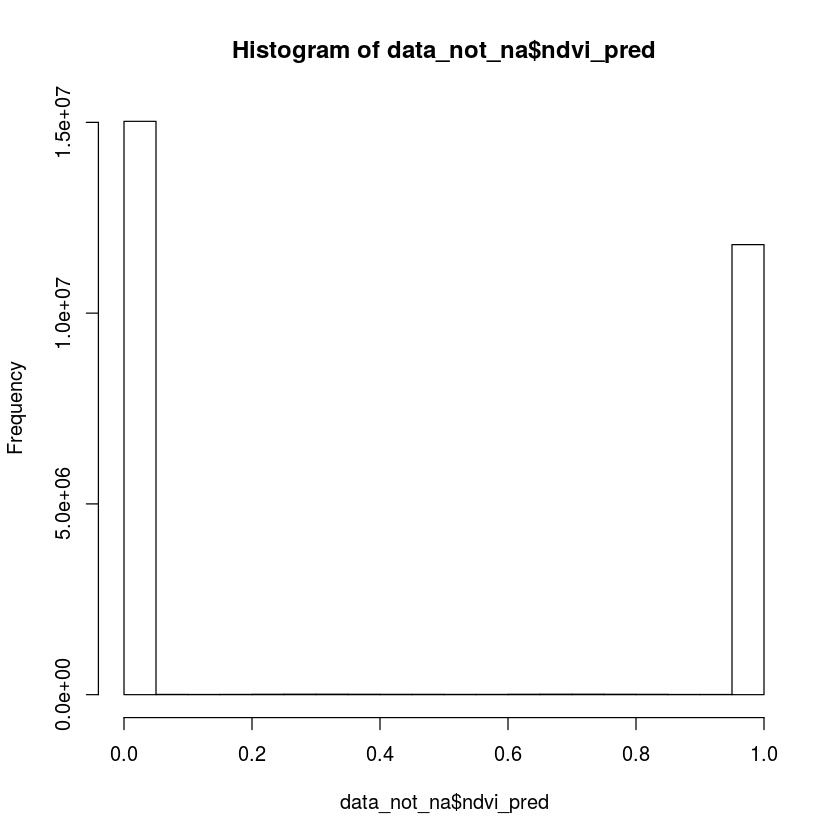

In [33]:
hist(data_not_na$ndvi_pred)

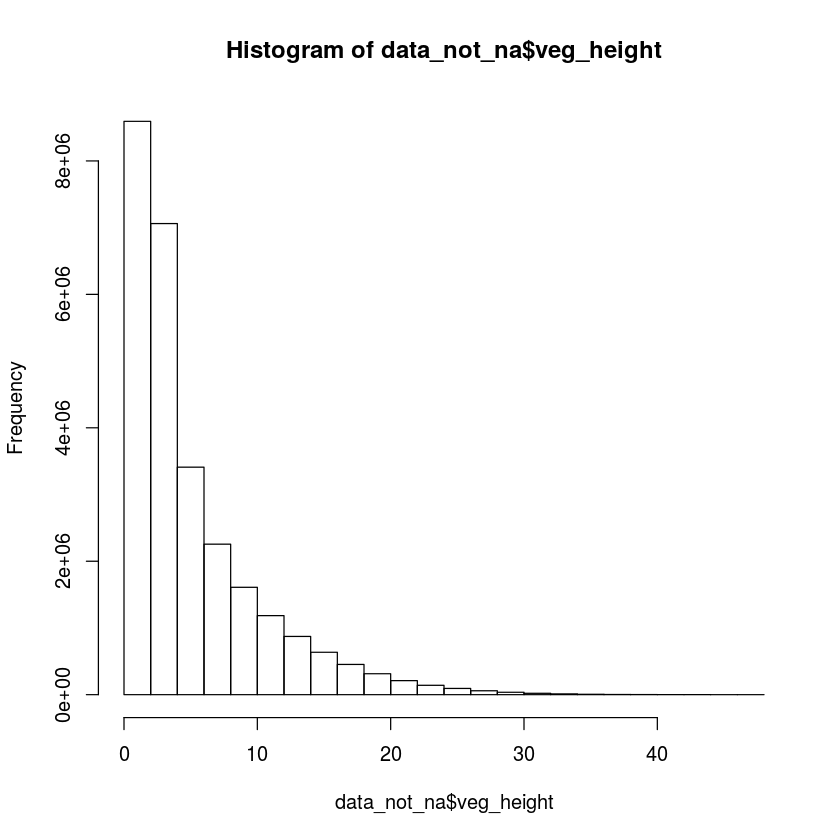

In [34]:
hist(data_not_na$veg_height)

In [35]:
save.image()